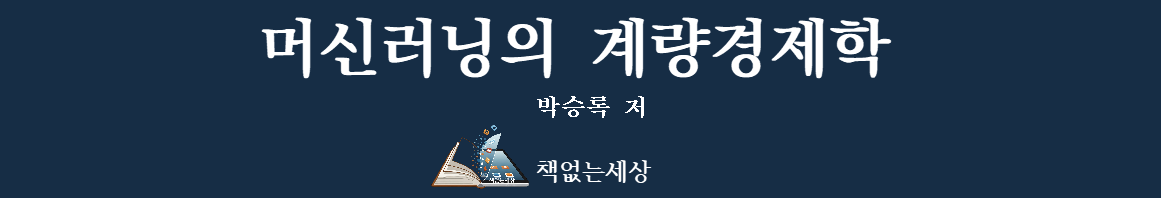

# Part 10: 딥러닝의 계량경제학

## Chapter 3: 딥러닝의 고급 기법

### 2. 하이퍼파라미터의 그리드 서치

### 나. 배치 크기와 에포크의 수 최적화

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:/Econometrics_with_ML")
# 현재 작업공간(working directory)확인  
os.getcwd() 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 배치 사이즈 및 에포크 수 튜닝을 위한 scikit-learn 활용
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# KerasClassifier 활용을 위한 모형 생성
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 동일한 결과 재생을 위한 random seed 부여
tf.random.set_seed(12345)

# 데이터 불러오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")

# 투입변수 input (X)와 산출변수 output (y) 
X = dataset[:,0:8]
y = dataset[:,8]

# 모형 정의
model = KerasClassifier(model=create_model, verbose=0)

# 그리드 서치를 위한 배치사이즈와 에포크 수 정의
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# 분석결과의 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Best: 0.695312 using {'batch_size': 10, 'epochs': 100}
0.558594 (0.066368) with: {'batch_size': 10, 'epochs': 10}
0.622396 (0.047877) with: {'batch_size': 10, 'epochs': 50}
0.695312 (0.024080) with: {'batch_size': 10, 'epochs': 100}
0.610677 (0.034104) with: {'batch_size': 20, 'epochs': 10}
0.652344 (0.039964) with: {'batch_size': 20, 'epochs': 50}
0.677083 (0.010253) with: {'batch_size': 20, 'epochs': 100}
0.625000 (0.068998) with: {'batch_size': 40, 'epochs': 10}
0.627604 (0.023510) with: {'batch_size': 40, 'epochs': 50}
0.665365 (0.006639) with: {'batch_size': 40, 'epochs': 100}
0.576823 (0.047019) with: {'batch_size': 60, 'epochs': 10}
0.647135 (0.006639) with: {'batch_size': 60, 'epochs': 50}
0.664062 (0.005524) with: {'batch_size': 60, 'epochs': 100}
0.532552 (0.073726) with: {'batch_size': 80, 'epochs': 10}
0.630208 (0.022628) with: {'batch_size': 80, 'epochs': 50}
0.622396 (0.024774) with: {'batch_size': 80, 'epochs': 100}
0.561198 (0.065390) with: {'batch_size': 100, 'epochs':

### 다. 최적화 앨고리즘 튜닝

In [3]:
# 최적화 앨고리즘 튜닝을 위한 scikit-learn 활용
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# KerasClassifier 활용을 위한 모형 생성
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# 동일한 결과 재생을 위한 random seed 부여
tf.random.set_seed(12345)

# 데이터 불러오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")

# 투입변수 input (X)와 산출변수 output (y) 
X = dataset[:,0:8]
y = dataset[:,8]

# 모형 정의
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

# # 그리드 서치를 위한 옵티마이져 정의 
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(model__optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# 분석결과의 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.709635 using {'model__optimizer': 'Nadam'}
0.657552 (0.019488) with: {'model__optimizer': 'SGD'}
0.614583 (0.056005) with: {'model__optimizer': 'RMSprop'}
0.557292 (0.025582) with: {'model__optimizer': 'Adagrad'}
0.554688 (0.080118) with: {'model__optimizer': 'Adadelta'}
0.691406 (0.011500) with: {'model__optimizer': 'Adam'}
0.664062 (0.000000) with: {'model__optimizer': 'Adamax'}
0.709635 (0.036828) with: {'model__optimizer': 'Nadam'}


### 라. 학습률 및 모멘텀의 조정

In [4]:
# 학습률과 모멘텀 튜닝을 위한 scikit-learn 활용
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier

# KerasClassifier 활용을 위한 모형 생성
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# 동일한 결과 재생을 위한 random seed 부여
tf.random.set_seed(12345)

# 데이터 불러오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")

# 투입변수 input (X)와 산출변수 output (y) 
X = dataset[:,0:8]
y = dataset[:,8]

# 모형 정의
model = KerasClassifier(model=create_model, loss="binary_crossentropy",
                        optimizer="SGD", epochs=100, batch_size=10, verbose=0)

# 그리드 서치를 위한 학습률 및 모멘텀 정의
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# 분석결과의 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.683594 using {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.4}
0.661458 (0.059868) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.0}
0.653646 (0.007366) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.2}
0.683594 (0.027805) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.4}
0.656250 (0.015947) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.6}
0.674479 (0.035277) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.8}
0.674479 (0.023510) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.9}
0.665365 (0.011201) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.0}
0.670573 (0.036966) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.2}
0.657552 (0.013279) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.4}
0.658854 (0.015073) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.6}
0.649740 (0.003683)

### 마. 가중치의 초기화

In [10]:
# 추정 파라미터의 초기치 튜닝을 위한 scikit-learn 활용
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# KerasClassifier 활용을 위한 모형 생성
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), kernel_initializer=init_mode,
    activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 동일한 결과 재생을 위한 random seed 부여
tf.random.set_seed(12345)

# 데이터 불러오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")

# 투입변수 input (X)와 산출변수 output (y) 
X = dataset[:,0:8]
y = dataset[:,8]

# 모형 정의
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

# 그리드 서치를 위한 초기갑 부여방법의 정의
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal',
             'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(model__init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# 분석결과의 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.729167 using {'model__init_mode': 'normal'}
0.720052 (0.030978) with: {'model__init_mode': 'uniform'}
0.688802 (0.026748) with: {'model__init_mode': 'lecun_uniform'}
0.729167 (0.025780) with: {'model__init_mode': 'normal'}
0.651042 (0.001841) with: {'model__init_mode': 'zero'}
0.720052 (0.018136) with: {'model__init_mode': 'glorot_normal'}
0.700521 (0.011201) with: {'model__init_mode': 'glorot_uniform'}
0.690104 (0.027126) with: {'model__init_mode': 'he_normal'}
0.688802 (0.032106) with: {'model__init_mode': 'he_uniform'}


### 바. 활성화 함수의 선택

In [2]:
# 활성화 함수 튜닝을 위한 scikit-learn 활용
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# KerasClassifier 활용을 위한 모형 생성
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), kernel_initializer='uniform',
    activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 동일한 결과 재생을 위한 random seed 부여
tf.random.set_seed(12345)

# 데이터 불러오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")

# 투입변수 input (X)와 산출변수 output (y) 
X = dataset[:,0:8]
y = dataset[:,8]

# 모형 정의
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

# 그리드 서치를 위한 활성화 함수 정의
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid',
              'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# 분석결과의 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.738281 using {'model__activation': 'softplus'}
0.647135 (0.007366) with: {'model__activation': 'softmax'}
0.738281 (0.025315) with: {'model__activation': 'softplus'}
0.665365 (0.027126) with: {'model__activation': 'softsign'}
0.709635 (0.029635) with: {'model__activation': 'relu'}
0.664062 (0.014616) with: {'model__activation': 'tanh'}
0.690104 (0.015073) with: {'model__activation': 'sigmoid'}
0.671875 (0.019401) with: {'model__activation': 'hard_sigmoid'}
0.705729 (0.006639) with: {'model__activation': 'linear'}


### 사. 드롭아웃 규제의 튜닝

In [3]:
# Dropout Regularization을 위한 scikit-learn 활용
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasClassifier

# KerasClassifier 활용을 위한 모형 생성
def create_model(dropout_rate, weight_constraint):
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), kernel_initializer='uniform',
    activation='linear', kernel_constraint=MaxNorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 동일한 결과 재생을 위한 random seed 부여
tf.random.set_seed(12345)

# 데이터 불러오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")
print(dataset.dtype, dataset.shape)

# 투입변수 input (X)와 산출변수 output (y) 
X = dataset[:,0:8]
y = dataset[:,8]

# 모형 정의
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

# # 그리드 서치를 위한 제약조건과 dropout_rate 정의
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate,
                  model__weight_constraint=weight_constraint)

#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# 분석결과의 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


float64 (768, 9)


C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.727865 using {'model__dropout_rate': 0.1, 'model__weight_constraint': 5.0}
0.709635 (0.009744) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 1.0}
0.697917 (0.023939) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 2.0}
0.705729 (0.012075) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 3.0}
0.701823 (0.001841) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 4.0}
0.720052 (0.023939) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 5.0}
0.708333 (0.009744) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 1.0}
0.707031 (0.011500) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 2.0}
0.723958 (0.010253) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 3.0}
0.703125 (0.008438) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 4.0}
0.727865 (0.007366) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 5.0}
0.722656 (0.013902) with: {'model__dr

### 아. 은닉층 수의 튜닝

In [4]:
# 은닉층 수 튜닝을 위한 scikit-learn 활용
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.constraints import MaxNorm

# KerasClassifier 활용을 위한 모형 생성
def create_model(neurons):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(8,), kernel_initializer='uniform',
                    activation='linear', kernel_constraint=MaxNorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 동일한 결과 재생을 위한 random seed 부여
tf.random.set_seed(12345)

# 데이터 불러오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")

# 투입변수 input (X)와 산출변수 output (y) 
X = dataset[:,0:8]
y = dataset[:,8]

# 모형 정의
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

# 그리드 서치를 위한 뉴런 수 정의
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# 분석결과의 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.727865 using {'model__neurons': 25}
0.699219 (0.014616) with: {'model__neurons': 1}
0.714844 (0.012758) with: {'model__neurons': 5}
0.717448 (0.008027) with: {'model__neurons': 10}
0.714844 (0.019401) with: {'model__neurons': 15}
0.699219 (0.006379) with: {'model__neurons': 20}
0.727865 (0.014382) with: {'model__neurons': 25}
0.710938 (0.014616) with: {'model__neurons': 30}


### 3.  케라스 모형의 저장과 로드

In [9]:
# 모형의 구조와 추정 결과를 하나의 파일로 저장
import pandas as pd
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
# Part 10_Chapter1 모형의 추정결과 저장
#save_model(model, "Model/model.keras")

# Chapter1에서 저장된 모형 불러오기
model = load_model('Model/model.keras')
# 모형요약
model.summary()

# 데이터 불러오기
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
               ]
data = pd.read_csv('Data/pima-indians-diabetes.data.csv', header=None, names=column_names)
#dataset = loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = data.drop("Outcome", axis=1)  
y = data["Outcome"] 

# 모형평가
score = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665 (2.60 KB)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444 (1.74 KB)

compile_metrics: 74.48%


### 4. 최종모형 선택을 위한 체크포인트

In [10]:
# 모형의 검증 정확도가 개선될 때 추정치 체크
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

tf.random.set_seed(12345)

# 자료 읽어오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# 모형 생성
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모형 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 1) 모형개선이 이루어질 때 체크포인트 저장
# 모형 정확도 개선때마다 체크 포인트(checkpoint)하여 파일로 저장
filepath="Model/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

# 모형 추정
model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10,
          callbacks=[checkpoint], verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.52362, saving model to Model/weights-improvement-01-0.52.keras

Epoch 2: val_accuracy did not improve from 0.52362

Epoch 3: val_accuracy improved from 0.52362 to 0.54724, saving model to Model/weights-improvement-03-0.55.keras

Epoch 4: val_accuracy improved from 0.54724 to 0.56693, saving model to Model/weights-improvement-04-0.57.keras

Epoch 5: val_accuracy improved from 0.56693 to 0.57480, saving model to Model/weights-improvement-05-0.57.keras

Epoch 6: val_accuracy improved from 0.57480 to 0.57874, saving model to Model/weights-improvement-06-0.58.keras

Epoch 7: val_accuracy improved from 0.57874 to 0.59843, saving model to Model/weights-improvement-07-0.60.keras

Epoch 8: val_accuracy improved from 0.59843 to 0.61417, saving model to Model/weights-improvement-08-0.61.keras

Epoch 9: val_accuracy improved from 0.61417 to 0.62205, saving model to Model/weights-improvement-09-0.62.keras

Epoch 10: val_accuracy improved from 0.62205 t

In [12]:
# 2) 최고 성능 모형만 저장하기
# 모형의 훈련과정에서 최고 성능 추정치만 저장
filepath="Model/weights.best.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# 모형 추정
model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10,
callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.73622, saving model to Model/weights.best.keras

Epoch 2: val_accuracy did not improve from 0.73622

Epoch 3: val_accuracy did not improve from 0.73622

Epoch 4: val_accuracy did not improve from 0.73622

Epoch 5: val_accuracy did not improve from 0.73622

Epoch 6: val_accuracy did not improve from 0.73622

Epoch 7: val_accuracy did not improve from 0.73622

Epoch 8: val_accuracy did not improve from 0.73622

Epoch 9: val_accuracy improved from 0.73622 to 0.74016, saving model to Model/weights.best.keras

Epoch 10: val_accuracy did not improve from 0.74016

Epoch 11: val_accuracy did not improve from 0.74016

Epoch 12: val_accuracy did not improve from 0.74016

Epoch 13: val_accuracy did not improve from 0.74016

Epoch 14: val_accuracy did not improve from 0.74016

Epoch 15: val_accuracy did not improve from 0.74016

Epoch 16: val_accuracy did not improve from 0.74016

Epoch 17: val_accuracy did not improve from 0.74016

Epoch 18: val_accu

In [ ]:
# 3) EarlyStopping과 함께 사용하기
# 모형의 훈련과정에서 정확도가 악화될 때 훈련 중단
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)
callbacks_list = [checkpoint, early_stop]

# 모형 추정
model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10,
         callbacks=callbacks_list, verbose=0)


In [13]:
# 다. 저장된 모형 불러오기
# 모형의 checkpoint 과정에서 저장된 추정치 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

# 모형 생성
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모형 추정치(가중치) 불러오기
model.load_weights("Model/weights.best.keras")

# 모형 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

# 데이터 불러오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")

# 데이터를 입력 변수 input (X)와 출력변수 output (y)로 나누기
X = dataset[:,0:8]
y = dataset[:,8]

#불러온 가중치를 이용한 모형 평가
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Created model and loaded weights from file
compile_metrics: 76.82%


### 5. 모형 훈련과정의 시각적 추적 방법

C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


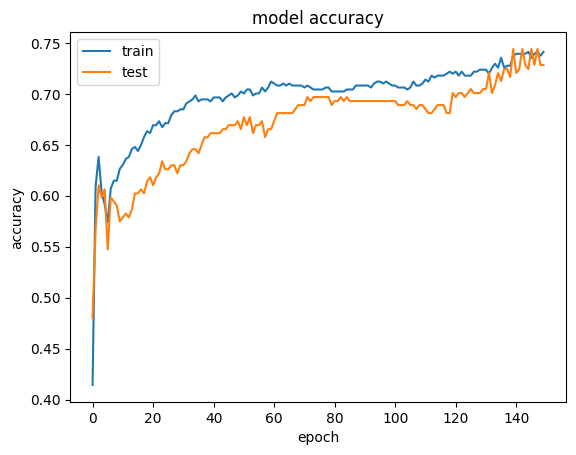

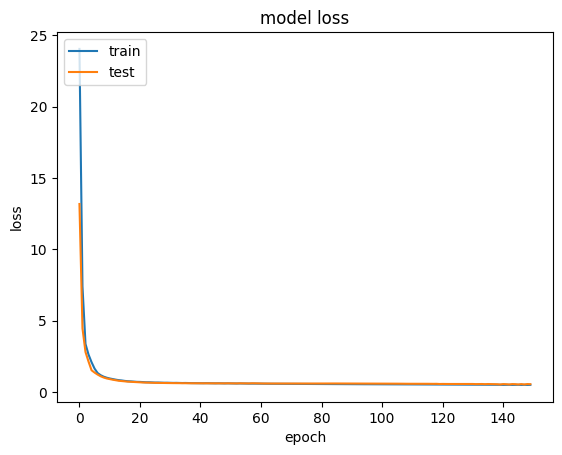

In [14]:
# 모형 훈련과정의 시각적 추적
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
dataset = np.loadtxt("Data/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# 모형 생성
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모형 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모형 추정
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# 모형 훈련과정의 이력 키워드 출력
print(history.history.keys())

# 정확도(accuracy) 이력 그래프 그리기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 손실(loss) 이력 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 6. 신경망 모형에서 활성화 함수

#### 1) 시그모이드 함수와 기울기 소실 문제

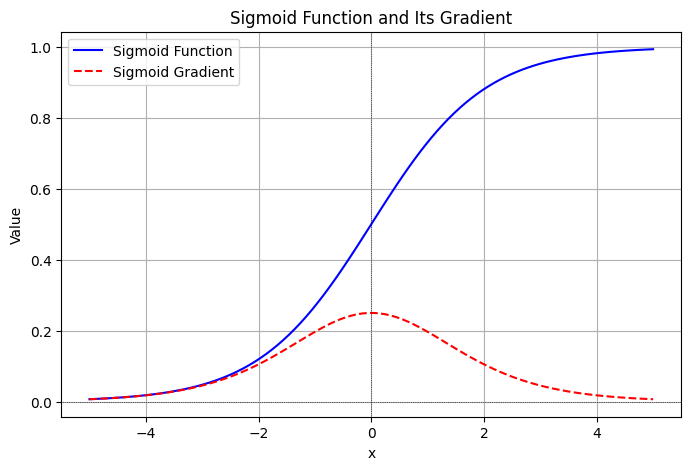

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

# x 값의 범위 설정
x = np.linspace(-5, 5, 100)

# 시그모이드 함수와 그래디언트 계산
y_sigmoid = sigmoid(x)
y_gradient = sigmoid_gradient(x)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, y_sigmoid, label='Sigmoid Function', color='blue')
plt.plot(x, y_gradient, label='Sigmoid Gradient', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')
plt.legend()
plt.title('Sigmoid Function and Its Gradient')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid()
plt.show()

#### 2) 하이퍼볼릭 탄젠트 함수

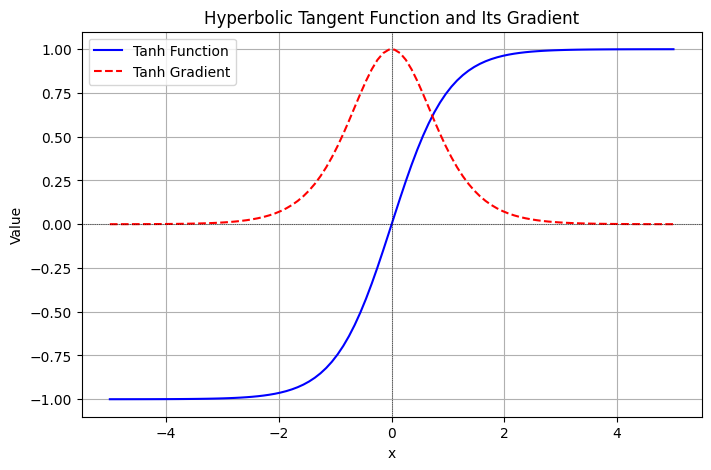

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def tanh_gradient(x):
    return 1 - np.tanh(x) ** 2

# x 값의 범위 설정
x = np.linspace(-5, 5, 100)

# 하이퍼볼릭 탄젠트 함수와 그래디언트 계산
y_tanh = tanh(x)
y_gradient = tanh_gradient(x)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, y_tanh, label='Tanh Function', color='blue')
plt.plot(x, y_gradient, label='Tanh Gradient', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')
plt.legend()
plt.title('Hyperbolic Tangent Function and Its Gradient')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid()
plt.show()

#### 3) ReLU 함수

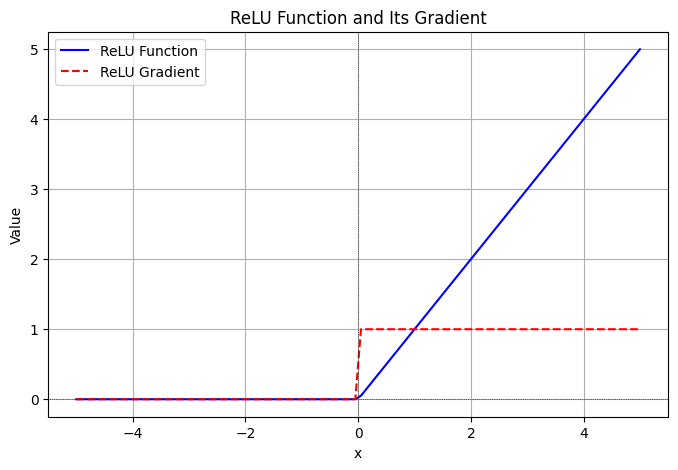

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def relu_gradient(x):
    return np.where(x > 0, 1, 0)

# x 값의 범위 설정
x = np.linspace(-5, 5, 100)

# ReLU 함수와 그래디언트 계산
y_relu = relu(x)
y_gradient = relu_gradient(x)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, y_relu, label='ReLU Function', color='blue')
plt.plot(x, y_gradient, label='ReLU Gradient', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')
plt.legend()
plt.title('ReLU Function and Its Gradient')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid()
plt.show()

#### 4) Leaky ReLU Function

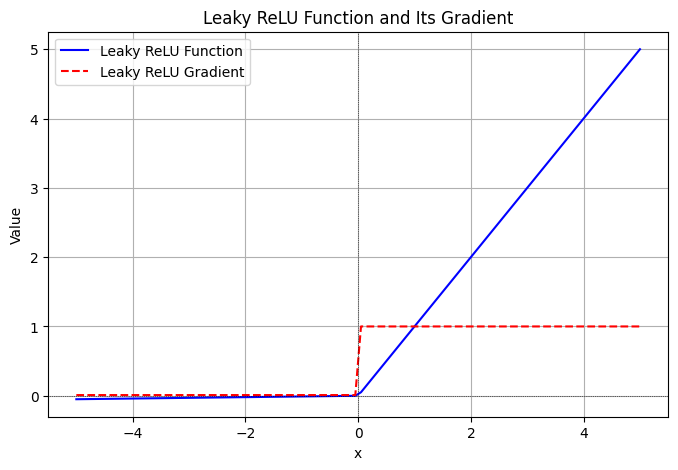

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_gradient(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# x 값의 범위 설정
x = np.linspace(-5, 5, 100)

# Leaky ReLU 함수와 그래디언트 계산
y_leaky_relu = leaky_relu(x)
y_gradient = leaky_relu_gradient(x)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, y_leaky_relu, label='Leaky ReLU Function', color='blue')
plt.plot(x, y_gradient, label='Leaky ReLU Gradient', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')
plt.legend()
plt.title('Leaky ReLU Function and Its Gradient')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid()
plt.show()

### 7. 손실함수

#### 1) 평균절대오차

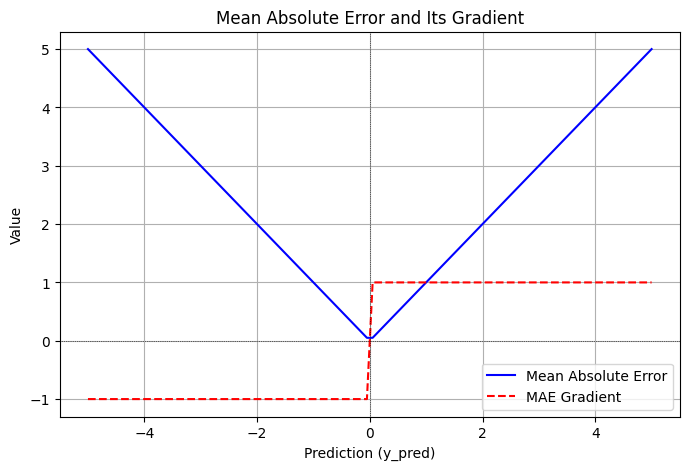

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def mean_absolute_error(y_true, y_pred):
    return np.abs(y_true - y_pred)

def mean_absolute_error_gradient(y_true, y_pred):
    return np.where(y_pred > y_true, 1, -1)

# x 값의 범위 설정
y_true = 0  # 기준값 설정
x = np.linspace(-5, 5, 100)

# Mean Absolute Error 함수와 그래디언트 계산
y_mae = mean_absolute_error(y_true, x)
y_gradient = mean_absolute_error_gradient(y_true, x)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, y_mae, label='Mean Absolute Error', color='blue')
plt.plot(x, y_gradient, label='MAE Gradient', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')
plt.legend()
plt.title('Mean Absolute Error and Its Gradient')
plt.xlabel('Prediction (y_pred)')
plt.ylabel('Value')
plt.grid()
plt.show()

#### 2) 평균제곱오차

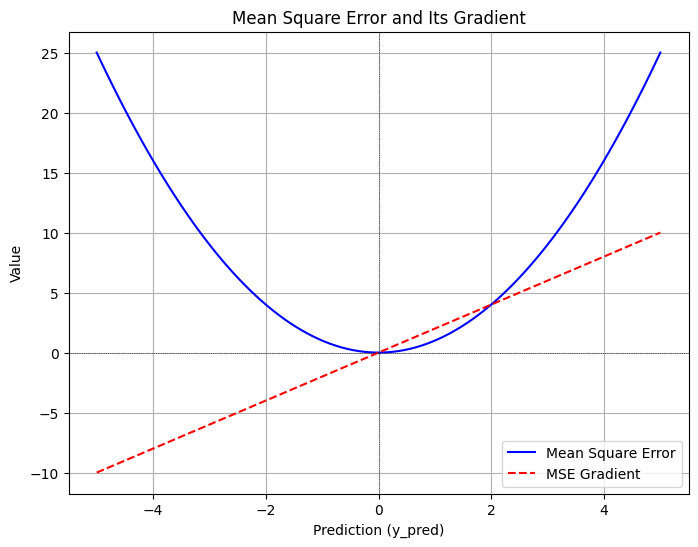

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def mean_square_error(y_true, y_pred):
    return (y_true - y_pred) ** 2

def mean_square_error_gradient(y_true, y_pred):
    return -2 * (y_true - y_pred)

# x 값의 범위 설정
y_true = 0  # 기준값 설정
x = np.linspace(-5, 5, 100)

# Mean Square Error 함수와 그래디언트 계산
y_mse = mean_square_error(y_true, x)
y_gradient = mean_square_error_gradient(y_true, x)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x, y_mse, label='Mean Square Error', color='blue')
plt.plot(x, y_gradient, label='MSE Gradient', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')
plt.legend()
plt.title('Mean Square Error and Its Gradient')
plt.xlabel('Prediction (y_pred)')
plt.ylabel('Value')
plt.grid()
plt.show()

#### 3) 로그 우도 손실함수

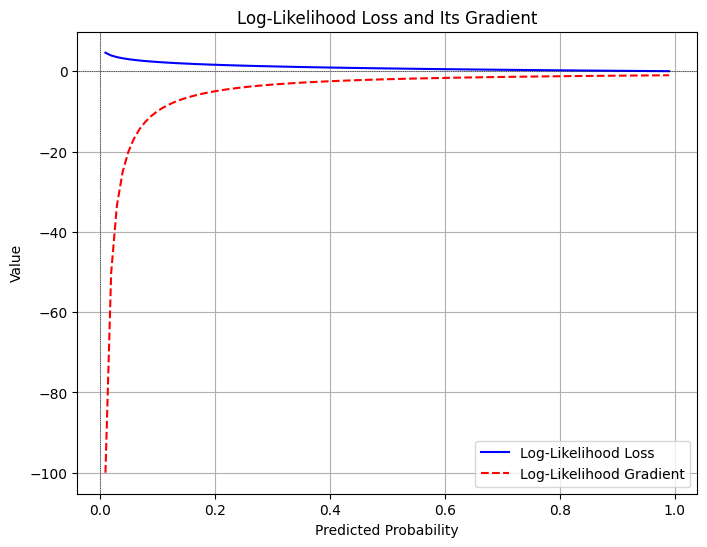

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def log_likelihood_loss(y_true, y_pred):
    return -np.log(y_pred + 1e-9) * y_true

def log_likelihood_gradient(y_true, y_pred):
    return -y_true / (y_pred + 1e-9)

# x 값의 범위 설정
x = np.linspace(0.01, 0.99, 100).reshape(-1, 1)  # 0과 1 사이 값으로 설정

# 예제 데이터 (단일 클래스)
y_true = np.array([[1]])  # 정답 클래스

# Log-Likelihood Loss 함수와 그래디언트 계산
y_ll = log_likelihood_loss(y_true, x)
y_gradient = log_likelihood_gradient(y_true, x)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x, y_ll, label='Log-Likelihood Loss', color='blue')
plt.plot(x, y_gradient, label='Log-Likelihood Gradient', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')
plt.legend()
plt.title('Log-Likelihood Loss and Its Gradient')
plt.xlabel('Predicted Probability')
plt.ylabel('Value')
plt.grid()
plt.show()

#### 4) 범주형 교차 엔트로피

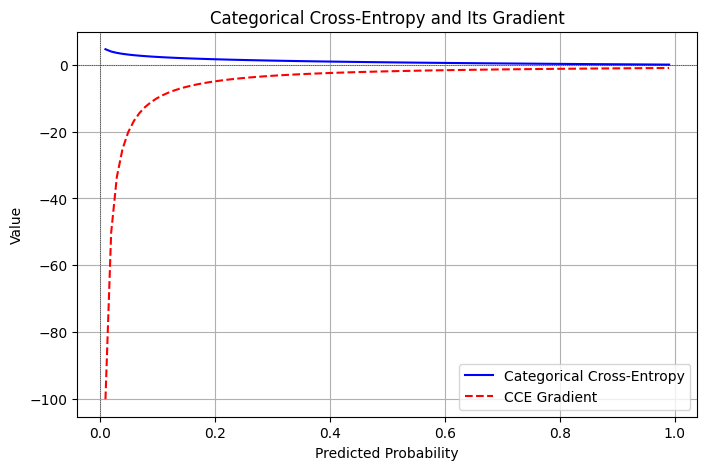

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def categorical_cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-9), axis=1)

def categorical_cross_entropy_gradient(y_true, y_pred):
    return -y_true / (y_pred + 1e-9)

# x 값의 범위 설정
x = np.linspace(0.01, 0.99, 100).reshape(-1, 1)  # 0과 1 사이 값으로 설정

# 예제 데이터 (단일 클래스)
y_true = np.array([[1]])  # 정답 클래스

# Categorical Cross-Entropy 함수와 그래디언트 계산
y_cce = categorical_cross_entropy(y_true, x)
y_gradient = categorical_cross_entropy_gradient(y_true, x)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, y_cce, label='Categorical Cross-Entropy', color='blue')
plt.plot(x, y_gradient, label='CCE Gradient', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')
plt.legend()
plt.title('Categorical Cross-Entropy and Its Gradient')
plt.xlabel('Predicted Probability')
plt.ylabel('Value')
plt.grid()
plt.show()

#### 5) 희소 범주형 교차 엔트로피

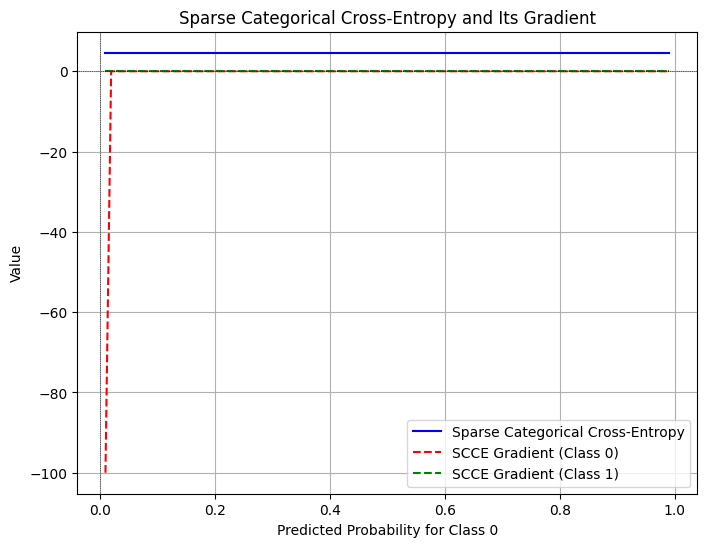

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def sparse_categorical_cross_entropy(y_true, y_pred):
    return -np.log(y_pred[np.arange(len(y_true)), y_true] + 1e-9)

def sparse_categorical_cross_entropy_gradient(y_true, y_pred):
    grad = np.zeros_like(y_pred)
    grad[np.arange(len(y_true)), y_true] = -1 / (y_pred[np.arange(len(y_true)), y_true] + 1e-9)
    return grad

# x 값의 범위 설정
x = np.linspace(0.01, 0.99, 100).reshape(-1, 1)  # 0과 1 사이 값으로 설정

# 예제 데이터 (단일 클래스)
y_true = np.array([0])  # 정답 클래스 (0번째 인덱스)
y_pred = np.hstack([x, 1 - x])  # 두 클래스 확률 예측

# Sparse Categorical Cross-Entropy 함수와 그래디언트 계산
y_scce = np.tile(sparse_categorical_cross_entropy(y_true, y_pred), (100,))
y_gradient = sparse_categorical_cross_entropy_gradient(y_true, y_pred)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x, y_scce, label='Sparse Categorical Cross-Entropy', color='blue')
plt.plot(x, y_gradient[:, 0], label='SCCE Gradient (Class 0)', color='red', linestyle='--')
plt.plot(x, y_gradient[:, 1], label='SCCE Gradient (Class 1)', color='green', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')
plt.legend()
plt.title('Sparse Categorical Cross-Entropy and Its Gradient')
plt.xlabel('Predicted Probability for Class 0')
plt.ylabel('Value')
plt.grid()
plt.show()

### 8. 규제를 통한 과적합 방지

#### 1) 입력층에서의 드롭아웃 적용

In [24]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 데이터 불러오기
dataframe = read_csv("Data/sonar3.csv", header=None)
dataset = dataframe.values

# 입력자료 input (X)와 출력자료 output (y) 정의
X = dataset[:,0:60].astype(float)
y = dataset[:,60]

# 출력자료 숫치화
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# 입력층에서 dropout 적용
def create_model():
    # 모형 생성
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(60,)))
    model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dense(1, activation='sigmoid'))
    # 모형 컴파일
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model,
epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\reg

Visible: 87.43% (5.55%)


#### 2) 은닉층에서의 드롭아웃 적용

In [27]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(60,),
    activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model,
                    epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_

Hidden: 85.12% (4.92%)


### 9. 학습률 조정과 성과개선

#### 1) 시간기반 학습률 스케줄(Time-Based Learning Rate Schedule)

In [28]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

# 자료 불러오기
dataframe = read_csv("Data/ionosphere.csv", header=None)
dataset = dataframe.values

#  입력자료 input (X)와 출력자료 output (y) 정의 
X = dataset[:,0:34].astype(float)
y = dataset[:,34]

# 출력자료 숫치화
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# 모형 생성
model = Sequential()
model.add(Dense(34, input_shape=(34,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모형 컴파일
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate,
nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# 모형 추정
model.fit(X, y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Epoch 1/50


C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


9/9 - 1s - 89ms/step - accuracy: 0.6085 - loss: 0.6880 - val_accuracy: 0.6810 - val_loss: 0.6263
Epoch 2/50
9/9 - 0s - 12ms/step - accuracy: 0.7745 - loss: 0.4976 - val_accuracy: 0.9052 - val_loss: 0.4143
Epoch 3/50
9/9 - 0s - 12ms/step - accuracy: 0.8809 - loss: 0.3713 - val_accuracy: 0.9052 - val_loss: 0.3617
Epoch 4/50
9/9 - 0s - 12ms/step - accuracy: 0.8979 - loss: 0.3025 - val_accuracy: 0.9224 - val_loss: 0.3078
Epoch 5/50
9/9 - 0s - 13ms/step - accuracy: 0.9191 - loss: 0.2546 - val_accuracy: 0.9569 - val_loss: 0.2324
Epoch 6/50
9/9 - 0s - 12ms/step - accuracy: 0.9234 - loss: 0.2151 - val_accuracy: 0.9569 - val_loss: 0.1910
Epoch 7/50
9/9 - 0s - 12ms/step - accuracy: 0.9319 - loss: 0.1862 - val_accuracy: 0.9655 - val_loss: 0.1686
Epoch 8/50
9/9 - 0s - 12ms/step - accuracy: 0.9362 - loss: 0.1657 - val_accuracy: 0.9741 - val_loss: 0.1491
Epoch 9/50
9/9 - 0s - 12ms/step - accuracy: 0.9362 - loss: 0.1485 - val_accuracy: 0.9741 - val_loss: 0.1350
Epoch 10/50
9/9 - 0s - 12ms/step - accu

#### 2) 감소기반 학습률 스케줄(Drop-Based Learning Rate Schedule)

In [29]:
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

# 학습률 
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# 데이터 읽어오기
dataframe = read_csv("Data/ionosphere.csv", header=None)
dataset = dataframe.values

#  입력자료 input (X)와 출력자료 output (y) 정의 
X = dataset[:,0:34].astype(float)
y = dataset[:,34]

# 출력자료 숫치화
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# 모형 생성
model = Sequential()
model.add(Dense(34, input_shape=(34,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모형 컴파일
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# 콜백
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# 모형추정
model.fit(X, y, validation_split=0.33, epochs=50, batch_size=28,
callbacks=callbacks_list, verbose=2)

Epoch 1/50


C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 - 1s - 87ms/step - accuracy: 0.7447 - loss: 0.5771 - val_accuracy: 0.6810 - val_loss: 0.6100 - learning_rate: 0.1000
Epoch 2/50
9/9 - 0s - 12ms/step - accuracy: 0.8553 - loss: 0.4123 - val_accuracy: 0.9483 - val_loss: 0.3887 - learning_rate: 0.1000
Epoch 3/50
9/9 - 0s - 13ms/step - accuracy: 0.9064 - loss: 0.2893 - val_accuracy: 0.9569 - val_loss: 0.2377 - learning_rate: 0.1000
Epoch 4/50
9/9 - 0s - 12ms/step - accuracy: 0.9234 - loss: 0.2169 - val_accuracy: 0.9655 - val_loss: 0.1529 - learning_rate: 0.1000
Epoch 5/50
9/9 - 0s - 12ms/step - accuracy: 0.9319 - loss: 0.1710 - val_accuracy: 0.9655 - val_loss: 0.0988 - learning_rate: 0.1000
Epoch 6/50
9/9 - 0s - 12ms/step - accuracy: 0.9574 - loss: 0.1376 - val_accuracy: 0.9741 - val_loss: 0.0814 - learning_rate: 0.1000
Epoch 7/50
9/9 - 0s - 12ms/step - accuracy: 0.9574 - loss: 0.1176 - val_accuracy: 0.9741 - val_loss: 0.1148 - learning_rate: 0.1000
Epoch 8/50
9/9 - 0s - 13ms/step - accuracy: 0.9702 - loss: 0.0960 - val_accuracy: 0.974